In [1]:
str.low?

Object `str.low` not found.


In [2]:
import numpy as np
str.low?

Object `str.low` not found.


In [3]:
str.low??

Object `str.low` not found.


In [4]:
str.lower?

Signature: str.lower(self, /)
Docstring: Return a copy of the string converted to lowercase.
Type:      method_descriptor


In [1]:
force_06.head()

NameError: name 'force_06' is not defined

# ：x轴力数据的可视化，峰值检测，标记

In [2]:
import pandas as pd

In [3]:
force_06 = pd.read_csv('GP1_0.6_force.csv')

In [4]:
force_06.head()

,FP1_x,FP2_x,FP1_y,FP2_y,FP1_z,FP2_z
0,0.0,-9.537293,0.0,30.241894,0.0,777.790222
1,0.0,-8.993257,0.0,30.251348,0.0,777.832886
2,0.0,-8.459884,0.0,30.250864,0.0,777.852966
3,0.0,-7.937055,0.0,30.241360,0.0,777.852539
4,0.0,-7.424666,0.0,30.223719,0.0,777.833374


In [5]:
import matplotlib as mplt
import matplotlib.pyplot as plt

In [6]:
force_06.iloc[1:100,].plot(figsize(20,100))

NameError: name 'figsize' is not defined

In [ ]:
force_06.iloc[1:100,].plot(figsize=(20,100))

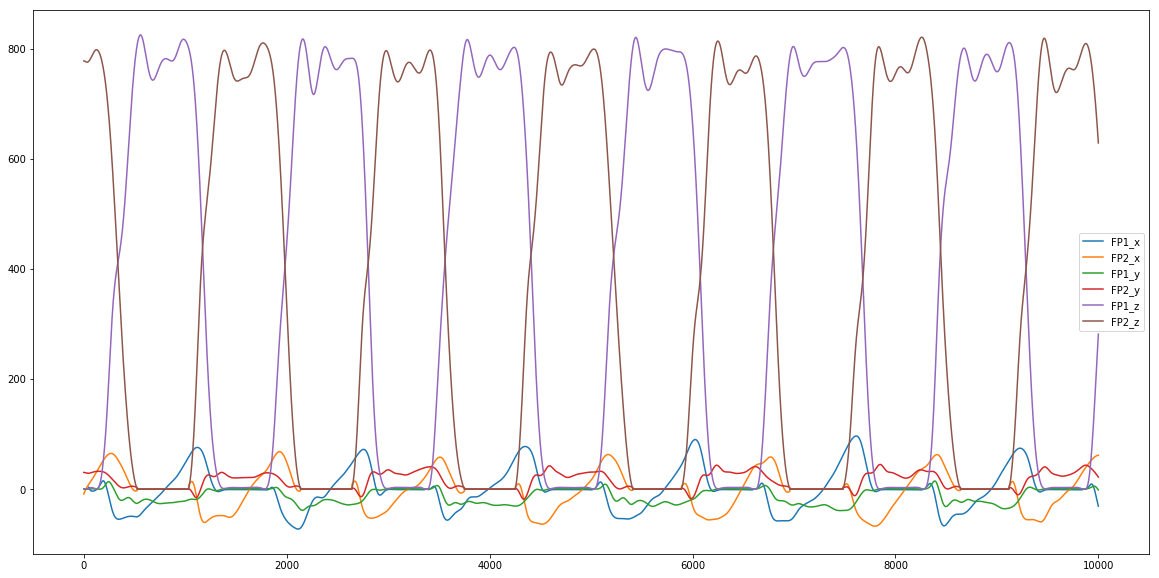

In [9]:
force_06.iloc[1:10000,].plot(figsize=(20,10))

In [10]:
force_16 = pd.read_csv('GP1_1.6.force.csv')
f,axarr = plt.subplots(2,sharex = True)
axarr[0].plot(force_06.index.values[:5000], force_06['FP1_z'].iloc[:5000])
axarr[0].set_title('Sharing X axis')
axarr[1].plot(force_16.index.values[:5000],force_16['FP1_z'].iloc[:5000])

FileNotFoundError: File b'GP1_1.6.force.csv' does not exist

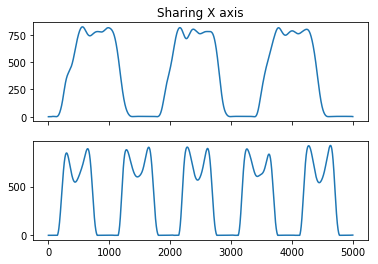

In [11]:
force_16 = pd.read_csv('GP1_1.6_force.csv')
f,axarr = plt.subplots(2,sharex = True)
axarr[0].plot(force_06.index.values[:5000], force_06['FP1_z'].iloc[:5000])
axarr[0].set_title('Sharing X axis')
axarr[1].plot(force_16.index.values[:5000],force_16['FP1_z'].iloc[:5000])

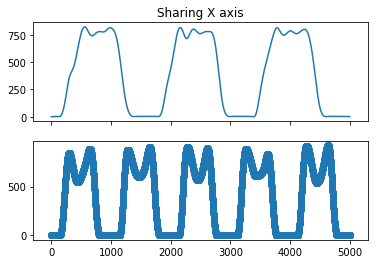

In [13]:
force_16 = pd.read_csv('GP1_1.6_force.csv')
f,axarr = plt.subplots(2,sharex = True)
axarr[0].plot(force_06.index.values[:5000], force_06['FP1_z'].iloc[:5000])
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(force_16.index.values[:5000],force_16['FP1_z'].iloc[:5000])

Text(0.5,1,'GP1_1.6_force->FP1_z')

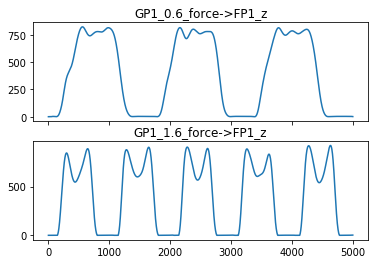

In [15]:
force_16 = pd.read_csv('GP1_1.6_force.csv')
f,axarr = plt.subplots(2,sharex = True)
axarr[0].plot(force_06.index.values[:5000], force_06['FP1_z'].iloc[:5000])
axarr[0].set_title('GP1_0.6_force->FP1_z')
axarr[1].plot(force_16.index.values[:5000],force_16['FP1_z'].iloc[:5000])
axarr[1].set_title('GP1_1.6_force->FP1_z')

上图展示了在速度为0.6m/s、1.6m/s时，被试1的足底压力力在z方向上的变化。可以看出，随着速度的增加，力在z轴上的幅值没有基本没有变化，但是频率增大了很多。
考虑到人体实际走路的情况，当z轴上的力从0开始急速增加时，认为是HS;当z轴上的力急速降到0时，认为是TO。

Text(0.5,1,'GP1_1.6_force->FP1_x')

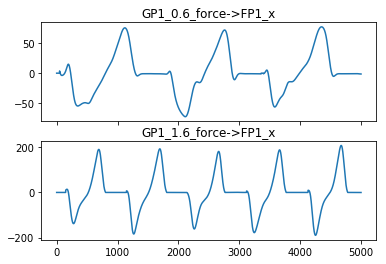

In [16]:
f,axarr = plt.subplots(2,sharex = True)
axarr[0].plot(force_06.index.values[:5000], force_06['FP1_x'].iloc[:5000])
axarr[0].set_title('GP1_0.6_force->FP1_x')
axarr[1].plot(force_16.index.values[:5000],force_16['FP1_x'].iloc[:5000])
axarr[1].set_title('GP1_1.6_force->FP1_x')

在速度为0.6m/s、1.6m/s时，被试1的足底压力在x轴上的变化情况。随着速度的增加，频率和峰值均增加。考虑人走路时的其的情况，可以认为，当x轴上力为局部最大值时，为HS;当x轴上的力为局部最小值时，为TO。

Text(0.5,1,'GP1_1.6_force->FP1_y')

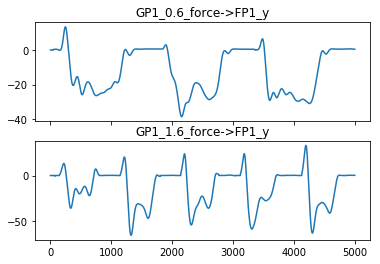

In [17]:
f,axarr = plt.subplots(2,sharex = True)
axarr[0].plot(force_06.index.values[:5000], force_06['FP1_y'].iloc[:5000])
axarr[0].set_title('GP1_0.6_force->FP1_y')
axarr[1].plot(force_16.index.values[:5000],force_16['FP1_y'].iloc[:5000])
axarr[1].set_title('GP1_1.6_force->FP1_y')

在速度为0.6m/s、1.6m/s时，被试1的足底压力在y轴上的变化情况。
y轴上的变化趋势不明显。左右方向不影响一个人的走路速度。

假设一个轴能提供足够的分类信息。所以，我们使用FP1_x的数据来分类。

In [28]:
from scipy.signal import argrelextrema
import numpy as np

In [19]:
argrelextrema

<function scipy.signal._peak_finding.argrelextrema(data, comparator, axis=0, order=1, mode='clip')>

In [30]:
def  findLocalMax(FP1_x_array):
    maxInd = argrelextrema(FP1_x_array,np.greater)
    print(maxInd);
    maxInd = maxInd[0]
    for i in range(1,len(maxInd)-1):
        cur = FP1_x_array[maxInd[i]]
        prev = FP1_x_array[maxInd[i-1]]
        nex = FP1_x_array[maxInd[i+1]]
        if(cur-prev <70 and cur -nex <70):
            maxInd[i]  = 0
    maxInd = [a for a in maxInd if a!= 0]
    return  maxInd

In [25]:
x = force_06['FP1_x'].values

In [26]:
x

array([ 0.      ,  0.      ,  0.      , ..., -0.314791, -0.440172,
       -0.575405])

In [32]:
maxInd =  findLocalMax(x)
maxInd

(array([   48,   192,   466,  1119,  1431,  1556,  1672,  1856,  2304,
        2758,  3019,  3186,  3291,  3295,  3451,  3830,  4351,  4644,
        4783,  4925,  5092,  5298,  6026,  6303,  6423,  6683,  6882,
        7613,  7903,  8006,  8014,  8020,  8095,  8103,  8123,  8132,
        8341,  8616,  9228,  9520,  9687,  9774,  9931, 10841, 11128,
       11245, 11362, 11531, 12070, 12457, 12705, 12849, 12992, 13175,
       13403, 14064, 14315, 14467, 14473, 14598, 14772, 15623, 15916,
       16007, 16016, 16023, 16074, 16174, 16329, 17202, 17497, 17613,
       17704, 17869, 18736, 19002, 19100, 19270, 19425, 19955, 20321,
       20591, 20712, 20895, 21038, 21874, 22154, 22358, 22367, 22376,
       22385, 22583, 23448, 23728, 23833, 23931, 24135, 24961, 25226,
       25485, 25681, 26089, 26560, 26862, 27008, 27026, 27119, 27266,
       28156, 28444, 28577, 28584, 28663, 28876, 29277, 29801, 30073,
       30276, 30358, 30544, 31394, 31698, 31892, 32097, 32969, 33239,
       33340, 33507

[48,
 1119,
 2758,
 4351,
 6026,
 7613,
 9228,
 10841,
 12457,
 14064,
 15623,
 21874,
 26560,
 28156,
 32969,
 34563,
 39183,
 45292,
 49978,
 51559,
 53158,
 57875,
 59486,
 59978]

In [35]:
sample_ind = [a for a in maxInd if a < 10000]
ind = force_06['FP1_x'].index.values
print(ind);
x = force_06['FP1_x'].values
print(x)

[    0     1     2 ... 59997 59998 59999]
[ 0.        0.        0.       ... -0.314791 -0.440172 -0.575405]


In [36]:
from pylab import *

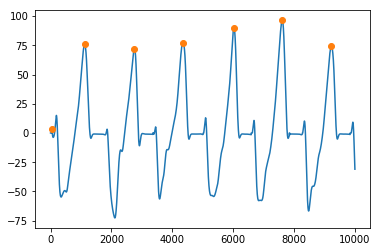

In [37]:
plot(ind[:10000],x[:10000])
plot(ind[:10000][sample_ind],x[:10000][sample_ind],'o',label= "max")

至此，找到了峰值，即局部最大值，或者称之为HS。

   标记数据：HS为事件1， 其他事件为0

In [39]:
#标记HS事件函数
def labelHS(df, maxInd):
    df['event'] = 0;
    df['event'][maxInd] = 1;
    return df

In [40]:
force_06 = labelHS(force_06,maxInd)

C:\Users\win10\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [41]:
print(force_06)

          FP1_x     FP2_x     FP1_y      FP2_y     FP1_z       FP2_z  event
0      0.000000 -9.537293  0.000000  30.241894  0.000000  777.790222      0
1      0.000000 -8.993257  0.000000  30.251348  0.000000  777.832886      0
2      0.000000 -8.459884  0.000000  30.250864  0.000000  777.852966      0
3      0.000000 -7.937055  0.000000  30.241360  0.000000  777.852539      0
4      0.000000 -7.424666  0.000000  30.223719  0.000000  777.833374      0
5      0.000000 -6.922601  0.000000  30.198772  0.000000  777.797241      0
6      0.000000 -6.430703  0.000000  30.167316  0.000000  777.746155      0
7      0.000000 -5.948761  0.000000  30.130096  0.000000  777.681580      0
8      0.000000 -5.476509  0.000000  30.087822  0.000000  777.605469      0
9      0.000000 -5.013649  0.000000  30.041161  0.000000  777.519104      0
10     0.000000 -4.559881  0.000000  29.990738  0.000000  777.424255      0
11     0.000000 -4.114941  0.000000  29.937136  0.000000  777.322449      0
12     0.000

In [42]:
force_06['event'].sum()

24

至此完成了事件的标记。为后续的机器学习训练奠定了基础。

In [44]:
#画出峰值点
def plotSampleMax(df,maxInd):
    sample_Ind = [a for a in maxInd if a<10000]
    ind = df['FP1_x'].index.values
    x = df['FP1_x'].values
    plt.plot(ind[:10000],x[:10000])
    plt.plot(ind[:10000][sample_ind],x[:10000][sample_ind],"o",label ="max")

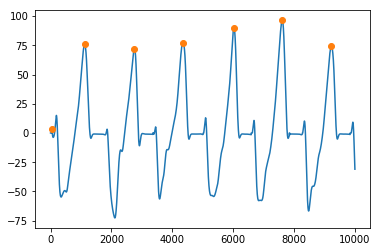

In [45]:
plotSampleMax(force_06,sample_ind)

至此，画出了force_06的局部峰值点。

# ：scipy相关的函数学习

## ： 峰值检测函数

In [46]:
 from scipy import signal
 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
 sig_noise = sig + np.random.randn(len(sig))
 corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

C:\Users\win10\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
C:\Users\win10\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


C:\Users\win10\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


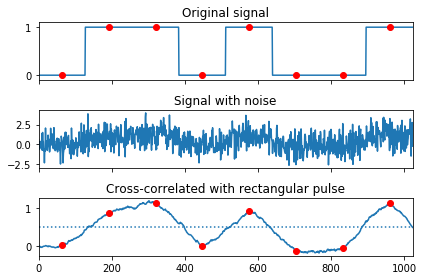

In [47]:
import matplotlib.pyplot as plt
clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
fig.show()

In [48]:
#argrelmin(s)函数
from scipy.signal import argrelmin
x = np.array([2, 1, 2, 3, 2, 0, 1, 0])
print(argrelmin(x))
#(array([1, 5]),)
y = np.array([[1, 2, 1, 2], [2, 2, 0, 0], [5, 3, 4, 4]])
print(argrelmin(y, axis=1))
#(array([0, 2]), array([2, 1]))

(array([1, 5], dtype=int64),)
(array([0, 2], dtype=int64), array([2, 1], dtype=int64))


In [49]:
#grgrelmax(s)函数
from scipy.signal import argrelmax
x = np.array([2, 1, 2, 3, 2, 0, 1, 0])
print(argrelmax(x))
y = np.array([[1, 2, 1, 2], [2, 2, 0, 0],[5, 3, 4, 4]])
print(argrelmax(y, axis=1))

(array([3, 6], dtype=int64),)
(array([0], dtype=int64), array([1], dtype=int64))


In [50]:
#argrelextrema()函数
from scipy.signal import argrelextrema
x = np.array([2, 1, 2, 3, 2, 0, 1, 0])
print(argrelextrema(x, np.greater))

y = np.array([[1, 2, 1, 2],[2, 2, 0, 0],[5, 3, 4, 4]])
print(argrelextrema(y, np.less, axis=1))

(array([3, 6], dtype=int64),)
(array([0, 2], dtype=int64), array([2, 1], dtype=int64))


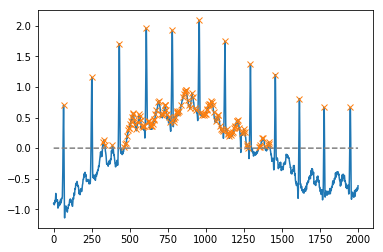

In [51]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

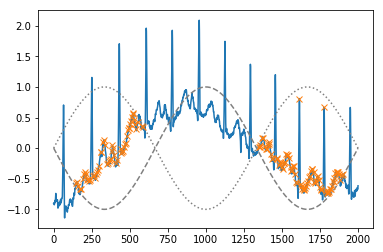

In [52]:
border = np.sin(np.linspace(0, 3 * np.pi, x.size))
peaks, _ = find_peaks(x, height=(-border, border))
plt.plot(x)
plt.plot(-border, "--", color="gray")
plt.plot(border, ":", color="gray")
plt.plot(peaks, x[peaks], "x")
plt.show()

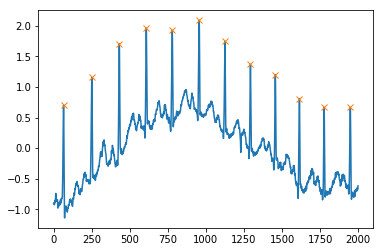

In [53]:
peaks, _ = find_peaks(x, distance=150)
np.diff(peaks)
array([186, 180, 177, 171, 177, 169, 167, 164, 158, 162, 172])
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

0.5049999999999999


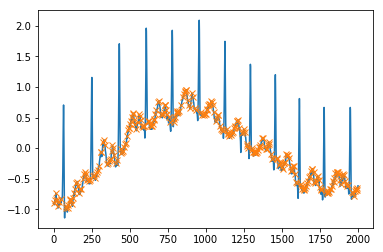

In [54]:
peaks, properties = find_peaks(x, prominence=(None, 0.6))
print(properties["prominences"].max())
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

[1.495 2.3  ] [36.93773946 39.32723577]


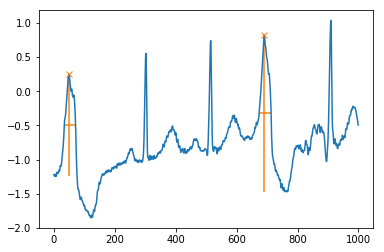

In [56]:
x = electrocardiogram()[17000:18000]
peaks, properties = find_peaks(x, prominence=1, width=20)
print(properties["prominences"], properties["widths"])
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"], ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"], xmax=properties["right_ips"], color = "C1")
plt.show()

In [57]:
from scipy import signal
xs = np.arange(0, np.pi, 0.05)
data = np.sin(xs)
peakind = signal.find_peaks_cwt(data, np.arange(1,10))
peakind, xs[peakind], data[peakind]

C:\Users\win10\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([32], dtype=int64), array([1.6]), array([0.9995736]))

[1.24159486 0.47840168 0.28470524 3.10716793 0.284603   0.47822491
 2.48340261 0.47822491]


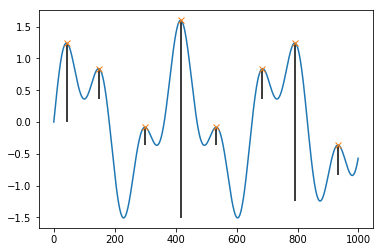

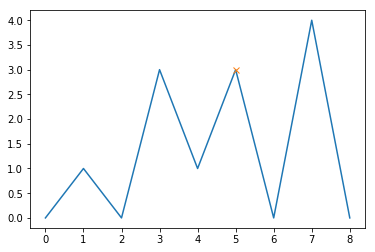

(array([3.]), array([2], dtype=int64), array([6], dtype=int64))
(array([2.]), array([4], dtype=int64), array([6], dtype=int64))


In [58]:
#scipy.signal.peak_prominences
from scipy.signal import find_peaks, peak_prominences
import matplotlib.pyplot as plt
x = np.linspace(0, 6 * np.pi, 1000)
x = np.sin(x) + 0.6 * np.sin(2.6 * x)
peaks, _ = find_peaks(x)
prominences = peak_prominences(x, peaks)[0]
print(prominences)
contour_heights = x[peaks] - prominences
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=contour_heights, ymax=x[peaks])
plt.show()
x = np.array([0, 1, 0, 3, 1, 3, 0, 4, 0])
peaks = np.array([5])
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()
print(peak_prominences(x, peaks)) # -> (prominences, left_bases, right_,!bases)
print(peak_prominences(x, peaks, wlen=3.1))


[ 64.25172825  41.29465463  35.46943289 104.71586081  35.46729324
  41.30429622 181.93835853  45.37078546]
[181.9396084   72.99284945  61.28657872 373.84622694  61.78404617
  72.48822812 253.09161876  79.36860878]


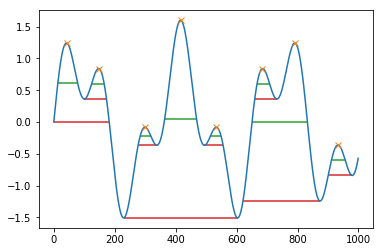

In [60]:
#scipy.signal.peak_widths
from scipy.signal import chirp, find_peaks, peak_widths
import matplotlib.pyplot as plt
x = np.linspace(0, 6 * np.pi, 1000)
x = np.sin(x) + 0.6 * np.sin(2.6 * x)
peaks, _ = find_peaks(x)
results_half = peak_widths(x, peaks, rel_height=0.5)
print(results_half[0]) # widths

results_full = peak_widths(x, peaks, rel_height=1)
print(results_full[0]) # widths

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.hlines(*results_half[1:], color="C2")
plt.hlines(*results_full[1:], color="C3")
plt.show()

## :频谱分析

periodogram(x[, fs, window, nfft, detrend, …])  Estimate power spectral density using a periodogram.

welch(x[, fs, window, nperseg, noverlap, …])  Estimate power spectral density using Welch’s method.

csd(x, y[, fs, window, nperseg, noverlap, …])  Estimate the cross power spectral density, Pxy, using Welch’s method.

coherence(x, y[, fs, window, nperseg, …])  Estimate the magnitude squared coherence estimate, Cxy, of discrete-time signals X and Y using Welch’s method.

spectrogram(x[, fs, window, nperseg, …])  Compute a spectrogram with consecutive Fourier transforms. lombscargle(x, y, freqs) Computes the Lomb-Scargle periodogram.
vectorstrength(events, period) Determine the vector strength of the events corresponding to the given period.

stft(x[, fs, window, nperseg, noverlap, …]) Compute the Short Time Fourier Transform (STFT).

istft(Zxx[, fs, window, nperseg, noverlap, …]) Perform the inverse Short Time Fourier transform(iSTFT).

check_COLA(window, nperseg, noverlap[, tol]) Check whether the Constant OverLap Add (COLA) constraintis met

check_NOLA(window, nperseg, noverlap[, tol]) Check whether the Nonzero Overlap Add (NOLA) constraintis met

### ： periodogram()函数

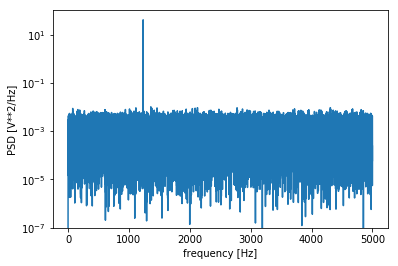

0.000997288923682429


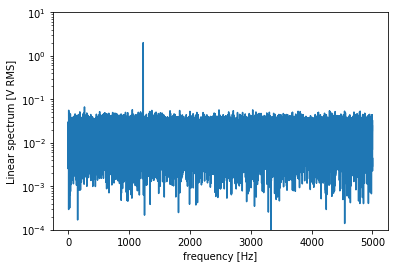

2.013874408965584


In [63]:
from scipy import signal
import matplotlib.pyplot as plt
np.random.seed(1234)
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
f, Pxx_den = signal.periodogram(x, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()
print(np.mean(Pxx_den[25000:]))
f, Pxx_spec = signal.periodogram(x, fs, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.ylim([1e-4, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()
print(np.sqrt(Pxx_spec.max()))

### : scipy.signal.welch() 函数

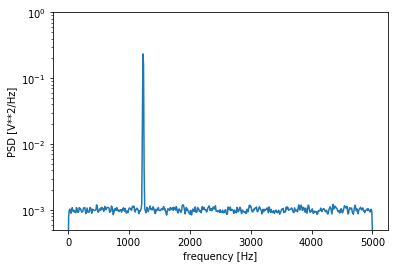

0.0009961552715877023


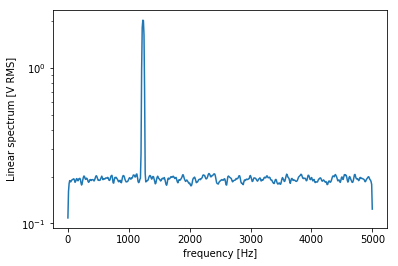

2.021749456489014


TypeError: welch() got an unexpected keyword argument 'average'

In [68]:
from scipy import signal
import matplotlib.pyplot as plt
np.random.seed(1234)
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
f, Pxx_den = signal.welch(x, fs, nperseg=1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()
print(np.mean(Pxx_den[256:]))
f, Pxx_spec = signal.welch(x, fs, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()
print(np.sqrt(Pxx_spec.max()))
x[int(N//2):int(N//2)+10] *= 50.
f, Pxx_den = signal.welch(x, fs, nperseg=1024)
f_med, Pxx_den_med = signal.welch(x, fs, nperseg=1024,average='median')
plt.semilogy(f, Pxx_den, label='mean')
plt.semilogy(f_med, Pxx_den_med, label='median')
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()
plt.show()

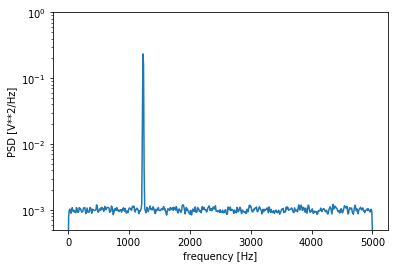

0.0009961552715877023


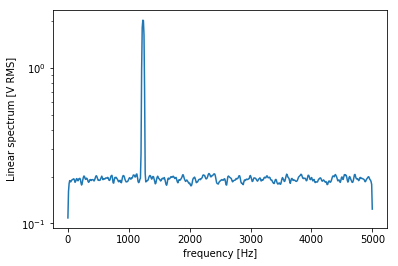

2.021749456489014


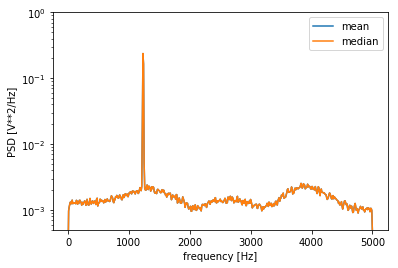

In [69]:
from scipy import signal
import matplotlib.pyplot as plt
np.random.seed(1234)
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
f, Pxx_den = signal.welch(x, fs, nperseg=1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()
print(np.mean(Pxx_den[256:]))
f, Pxx_spec = signal.welch(x, fs, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()
print(np.sqrt(Pxx_spec.max()))
x[int(N//2):int(N//2)+10] *= 50.
f, Pxx_den = signal.welch(x, fs, nperseg=1024)
f_med, Pxx_den_med = signal.welch(x, fs, nperseg=1024)#,average='median')
plt.semilogy(f, Pxx_den, label='mean')
plt.semilogy(f_med, Pxx_den_med, label='median')
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()
plt.show()